In [90]:
# handling file data
import pandas as pd
# handling numerical data
import numpy as np
# for ploting/visualisation
import matplotlib.pyplot as plt
import seaborn as sns 


import re
import string


# importing Natural Language Toolkit
import nltk

# removing stopwords
from nltk.corpus import stopwords
# lamatize text data
from nltk.stem import WordNetLemmatizer

In [91]:
train = pd.read_csv("/Users/ankitbaliyan/Documents/VS_Code/Ongoing projects/NLP_Disaster/dataset/train.csv")
test = pd.read_csv("/Users/ankitbaliyan/Documents/VS_Code/Ongoing projects/NLP_Disaster/dataset/test.csv")
submission = pd.read_csv("//Users/ankitbaliyan/Documents/VS_Code/Ongoing projects/NLP_Disaster/dataset/sample_sub.csv")

In [92]:
submission.shape

(3263, 2)

In [56]:
train.shape

(7613, 5)

In [94]:
train.head(50)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


0    4342
1    3271
Name: target, dtype: int64


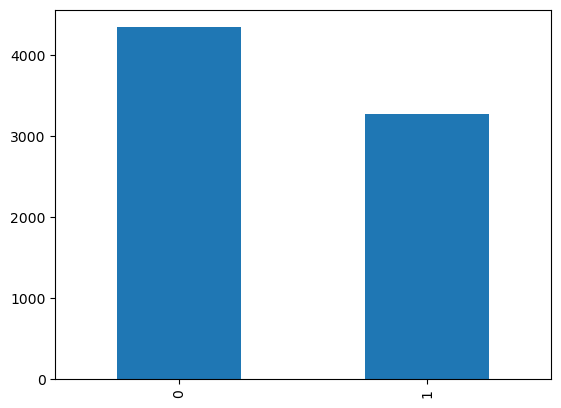

In [60]:
print( train.target.value_counts())
train.target.value_counts().plot.bar()
plt.show()

In [61]:
# merging datasets 
data=pd.concat([train, test], axis=0)
data.shape

(10876, 5)

In [62]:
# count length of the text/tweet
data['length']=data['text'].apply(lambda x: len(x))

# converting text into lower case
data['text']=data['text'].apply(lambda x: x.lower())

In [63]:
# removing stopwords
stop= stopwords.words('english')

data['text'] = data['text'].apply(lambda x: " ".join([word for word in x.split() if word not in stop]))

In [64]:

# removing special characters from text data
def remove_special_characters(text):
    # Define a list of special characters to remove
    special_chars = "!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"

    # Remove special characters using str.translate() method
    cleaned_text = text.translate(str.maketrans('', '', special_chars))
    return cleaned_text

data['text']=data['text'].apply(lambda x: remove_special_characters(x))



In [66]:
data=data[['text','target','length']]
data.head()

,text,target,length
0,deeds reason earthquake may allah forgive us,1.0,69
1,forest fire near la ronge sask canada,1.0,38
2,residents asked shelter place notified officer...,1.0,133
3,13000 people receive wildfires evacuation orde...,1.0,65
4,got sent photo ruby alaska smoke wildfires pou...,1.0,88


In [67]:
# lamatise the text 

lem = WordNetLemmatizer()

data['text'] = data['text'].apply(lambda x: lem.lemmatize(x))

In [68]:
# separating train and test data
i= train.shape[0]
train = data.iloc[:i]
test = data.iloc[i:]

In [71]:
train.shape

(7613, 3)

In [72]:
train = train[['text','length','target']]

In [73]:
x = train.drop('target',axis=1)
y=train['target']

In [74]:
# spliting data into train validation 
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val = train_test_split(x,y,train_size=0.8, random_state=120)

In [77]:
from sklearn.feature_extraction.text import CountVectorizer

# create instance
cv = CountVectorizer(max_features=5000)
# fit instance
cv.fit(train['text'])
# transform
x_train_cv = cv.transform(x_train['text']).toarray()
x_val_cv = cv.transform(x_val['text']).toarray()

train_cv = cv.transform(train['text']).toarray()
test_cv = cv.transform(test['text']).toarray()



In [79]:
# PCA - for dimensionality reduction
from sklearn.decomposition import PCA
n=2
pca = PCA(n_components=n)
pca2=PCA(n_components=n)

pca.fit(x_train_cv)
pca2.fit(train_cv)

# transform
x_train_rcv = pca.transform(x_train_cv)
x_val_rcv = pca.transform(x_val_cv)

train_rcv= pca2.transform(train_cv)
test_rcv = pca2.transform(test_cv)



In [80]:
# Building model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train_rcv, y_train)
y_pred = lr.predict(x_val_rcv)

lr_f = LogisticRegression()
lr_f.fit(train_rcv, y)
sub_pred= lr_f.predict(test_rcv)

In [89]:
# model accuracy

from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_pred, y_val))

print("confusion matrix")
print(confusion_matrix(y_pred, y_val))

print("\nvalue_counts of validation set predictions:\n", pd.DataFrame(y_pred).value_counts())

print("\nvalue_counts of test predictions:\n", pd.DataFrame(sub_pred).value_counts())

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.58      0.73      1449
         1.0       0.09      0.80      0.16        74

    accuracy                           0.59      1523
   macro avg       0.54      0.69      0.45      1523
weighted avg       0.94      0.59      0.71      1523

confusion matrix
[[847 602]
 [ 15  59]]

value_counts of validation set predictions:
 0.0    1449
1.0      74
dtype: int64

value_counts of test predictions:
 0.0    2909
1.0     354
dtype: int64


In [82]:
submission['target'] = sub_pred

In [83]:
submission['target'].value_counts()

0.0    2909
1.0     354
Name: target, dtype: int64

<AxesSubplot:>

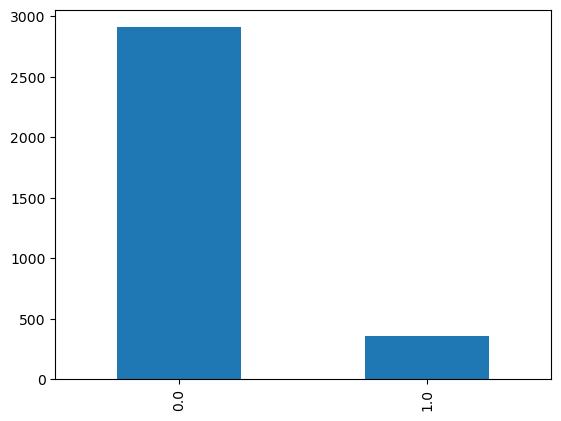

In [84]:
submission['target'].value_counts().plot(kind='bar')

In [50]:
#submission.to_csv("/Users/ankitbaliyan/Documents/VS_Code/NLP_Disaster/subission file/code_1.csv", index=False)